In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/4)%20Dimensionality%20Reduction/Principal%20Component%20Analysis%20(PCA)/data.csv"
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/4)%20Dimensionality%20Reduction/Principal%20Component%20Analysis%20(PCA)/labels.csv"

--2024-12-04 15:03:26--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/4)%20Dimensionality%20Reduction/Principal%20Component%20Analysis%20(PCA)/data.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206186150 (197M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 196.63M  75.9MB/s    in 2.6s    

2024-12-04 15:03:31 (75.9 MB/s) - ‘data.csv’ saved [206186150/206186150]

--2024-12-04 15:03:32--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/4)%20Dimensionality%20Reduction/Principal%20Component%20Analysis%20(PCA)/labels.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Co

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv')
labels = pd.read_csv('labels.csv')

In [4]:
data.rename(columns={'Unnamed: 0':'id'}, inplace=True)
labels.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [5]:
data.head()

,id,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [6]:
labels.head()

,id,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [7]:
merged = pd.merge(data,labels, on='id')

In [8]:
merged.head()

,id,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [9]:
merged = merged.drop(columns = ['id'])

In [10]:
X = merged.drop(columns = ['Class'])
y = merged['Class']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

In [13]:
evs = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(evs)

In [14]:
print("Explained Variance Ratio:",evs)
print('Cummulative Variance:',cumulative_variance)

Explained Variance Ratio: [0.10539781 0.08754232 0.07810081]
Cummulative Variance: [0.10539781 0.19294014 0.27104095]


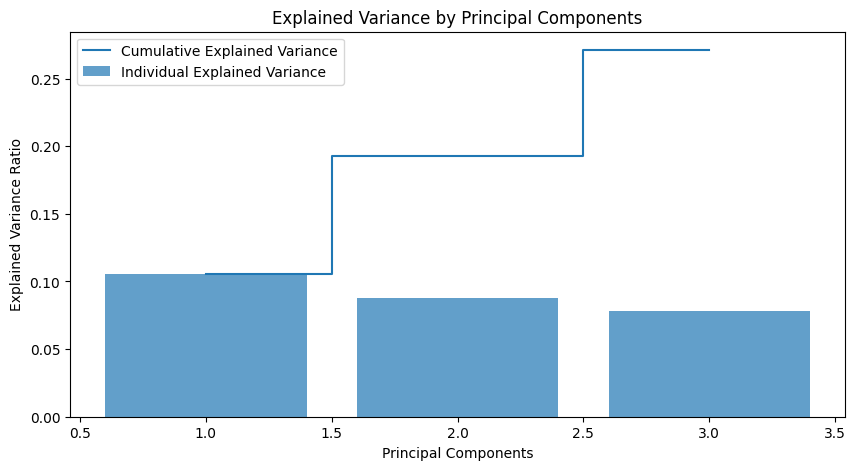

In [15]:
plt.figure(figsize = (10,5))
plt.bar(range(1,len(evs)+1), evs, alpha = 0.7, label ='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc = 'best')
plt.show()

In [16]:
pca_df = pd.DataFrame(X_pca,columns = ['PC1','PC2','PC3'])
pca_df['Class'] = y

In [17]:
fig = px.scatter_3d(
    pca_df,
    x = 'PC1', y = 'PC2', z= 'PC3',
    color = 'Class',
    title = '3D Visualization of Principal Components'
)
fig.show()

In [18]:
pca = PCA(n_components = 10)
X_pca_full = pca.fit_transform(X_scaled)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_full, y, test_size= 0.2, random_state = 42)

In [20]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_model.predict(X_test)

In [22]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

print('Accuracy Score:',acc)
print('Confusion Matrix:',conf)
print('Classification Report:',class_rep)

Accuracy Score: 0.9813664596273292
Confusion Matrix: [[60  0  0  1  0]
 [ 0 17  0  0  0]
 [ 1  0 24  0  0]
 [ 0  0  0 29  0]
 [ 1  0  0  0 28]]
Classification Report:               precision    recall  f1-score   support

        BRCA       0.97      0.98      0.98        61
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      0.96      0.98        25
        LUAD       0.97      1.00      0.98        29
        PRAD       1.00      0.97      0.98        29

    accuracy                           0.98       161
   macro avg       0.99      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161

